# Анализ бизнес-показателей приложения Procrastinate Pro+

**Цель анализа** — выявление причин убыточности бизнеса на протяжении нескольких прошлых месяцев, несмотря на колоссальные вложения в привлечение пользователей.

**Ход исследования**

Входные данные за период с 2019-05-01 по 2019-10-27:

 - данные о посещениях приложения новыми пользователями, зарегистрировавшимися в указанный период;
 - данные о покупках этих пользователей в указаный период;
 - статистика рекламных расходов в указанный период.

Анализ бизнес-показателей пройдёт в шесть этапов:

 1. Обзор данных.
 2. Предобработка данных.
 3. Функции для создания пользовательских профилей, для расчета и анализа удержания и конверсии, для расчета и анализа LTV и ROI.
 4. Исследовательский анализ данных.
 5. Маркетинг.
 6. Оценка окупаемости рекламы для привлечения пользователей.

<a id="start1"></a>
### Start

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try: # Локальный путь
    visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # покупки 
    pd.read_csv('costs_info_short.csv')    # траты на рекламу
)
except:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки  
    pd.read_csv('/datasets/costs_info_short.csv')    # траты на рекламу
)
 # 2 знака после точки для формата float    
pd.options.display.float_format ='{:,.2f}'.format 

Выведу на экран первые десять строк из каждой таблицы:

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
5,2019-05-06,FaceBoom,118.80
6,2019-05-07,FaceBoom,101.20
7,2019-05-08,FaceBoom,100.10
8,2019-05-09,FaceBoom,93.50
9,2019-05-10,FaceBoom,104.50


Получу общую информацию о всех таблицах:

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице **`visits`** шесть столбцов. В столбцах два типа данных — `int64` и `object`.

Согласно документации к данным:

- `User Id` — уникальный идентификатор пользователя
- `Device` — категория устройства пользователя
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Region` — страна пользователя

Все колонки не соответствуют стилю написания названий колонок.   
Пропущенных значений нет.
У значений столбцов `Session Start` и `Session End` неверный тип данных.

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице **`orders`** три столбца. В столбцах три типа данных — `int64`, `object` и `float64`.

Согласно документации к данным:

- `User Id` — уникальный идентификатор пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

Все колонки не соответствуют стилю написания названий колонок.   
Пропущенных значений нет.
У значений столбца `Event Dt` неверный тип данных.

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице **`costs`** три столбца. В столбцах  два типа данных — `object` и `float64`.

Согласно документации к данным:

- `Dt` — дата  
- `Channel` — идентификатор рекламного источника
- `Costs` — затраты на этот рекламный источник в этот день

Все колонки не соответствуют стилю написания названий колонок.   
Пропущенных значений нет.
У значений столбца `Dt` неверный тип данных.

**Выводы**

В таблицах содержатся данные о посещениях приложения новыми пользователями, о покупках этих пользователей и статистика рекламных расходов в указанный период.

Названия колонок в таблицах не соответствуют стилю написания названий колонок, типы данных нескольких столбцов таблиц неверный.

Для анализа данных необходимо изменить написание названий столбцов, изменить типы данных некоторых столбцов и проверить данные на наличие дубликатов.

## Предобработка данных

### Переименование столбцов

Для удобства выведу названия столбцов всех таблиц на экран.

In [9]:
# вывод названия столбцов
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [10]:
# вывод названия столбцов
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [11]:
# вывод названия столбцов
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

Приведу названия столбцов всех таблиц к общепринятому стилю. 

In [12]:
# изменение названий столбцов 
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

In [13]:
orders.sample()

,user_id,event_dt,revenue
32292,180373359683,2019-08-03 09:25:55,4.99


In [14]:
orders[orders['user_id'] == 538358634031]

,user_id,event_dt,revenue
32892,538358634031,2019-08-11 22:59:40,4.99


### Изменение типа данных

Значения столбцов с датами во всех трех таблицах приведу к формату даты.

In [15]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Дубликаты

Проверю наличие дубликатов во всех таблицах.

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

**Выводы**

- Изменены названия всех столбцов во всех таблицах в соответствии с общепринятых стилем написания, 
- типы данных значений столбцов с датами приведены в соответствующий формат,
- дубликатов данных в таблицах не обнаружено.

### Пропуски

Проверю наличие пропусков во всех таблицах.

In [19]:
round((visits.isna().mean()*100),2)

user_id         0.00
region          0.00
device          0.00
channel         0.00
session_start   0.00
session_end     0.00
dtype: float64

In [20]:
round((orders.isna().mean()*100),2)

user_id    0.00
event_dt   0.00
revenue    0.00
dtype: float64

In [21]:
round((costs.isna().mean()*100),2)

dt        0.00
channel   0.00
costs     0.00
dtype: float64

Пропусков во всех таблицах не обнаружено.

[в начало](#start1)

##  Функции для создания пользовательских профилей, для расчета и анализа удержания и конверсии, для расчета и анализа LTV и ROI.

Задам функции, которые буду использовать для дальнейшего анализа. 

### Функция для создания пользовательских профилей get_profiles():

In [22]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
     # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

### Функция для расчета удержания get_retention():

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета конверсии get_conversion():

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета LTV и ROI get_ltv():

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания фрейма filter_data():

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания plot_retention():

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


### Функция для визуализации конверсии plot_conversion():

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


### Функция для визуализации LTV и ROI plot_ltv_roi():

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Выводы**

Заданы функции для создания пользовательских профилей, для расчета и анализа удержания и конверсии, для расчета и анализа LTV и ROI.

[в начало](#start1)

## Исследовательский анализ данных

Получу профили пользователей с помощью функции get_profiles().

In [30]:
# других событий нет, None — чтобы не «сломать» get_profiles()
events = None  
# получение профилей пользователей
profiles = get_profiles(visits, orders, events, costs) 

In [31]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


Определю минимальную и максимальную дату привлечения пользователей.

In [32]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 
display('Минимальная дата привлечения пользователей: {}'.format(min_analysis_date))

'Минимальная дата привлечения пользователей: 2019-05-01'

In [33]:
display('Максимальная дата привлечения пользователей: {}'.format(observation_date))

'Максимальная дата привлечения пользователей: 2019-10-27'

### Страны пользователей

Напишу несколько функций,чтобы использовать их в зависимости от страны, устройства и источника привлечения.

Функция для определения количества пользователей и доли платящих.

In [34]:
# функция для создания таблицы с количеством пользователей и долями платящих
def df (col): 
    amount = profiles.groupby(col).agg(
        {'user_id': 'nunique', 'payer' : 'mean'}
    ).sort_values(by='payer', ascending=False)
    # создание столбца с долей платящих в процентах
    amount['payer, %'] = amount['payer']*100 
    # удаление столбца с долей платящих
    amount = amount.drop(columns=['payer'])
    return amount

Функция для визуализации количества пользователей.

In [35]:
# создание функции для построения круговой диаграммы 
# a, b, c - размеры диаграммы и расположение легенды
def create_pie (col, title, xlabel, a, b, c):
    platform_pie = col.sort_values(ascending=False).plot(
        kind='pie', 
        figsize=(a, b), 
        autopct='%1.1f%%')
    plt.title(title, fontsize=15)
    plt.ylabel('')
    plt.xlabel(xlabel, fontsize=12)
    plt.legend(bbox_to_anchor = (c, 0.65, 0.25, 0.25))
    return platform_pie

Функция для визуализации количества новых пользователей по времени привлечения.

In [36]:
# создание функции
def pl(col,window=7):
    # создание сводной таблицы
    pr_plot = profiles.pivot_table(
        index='dt', 
        columns=col, 
        values='user_id',  
        aggfunc='nunique',  
    )
    # построение графика и  сглаживание
    filter_data(pr_plot, window).plot(figsize=(15, 5), grid=True)
    plt.show()
    return pr_plot

Посмотрю географию пользователей, их количество и долю платящих по каждой стране.

In [37]:
region = df('region')
region

,user_id,"payer, %"
region,,
United States,100002,6.90
Germany,14981,4.11
UK,17575,3.98
France,17450,3.80


Построю круговую диаграмму с географией пользователей.

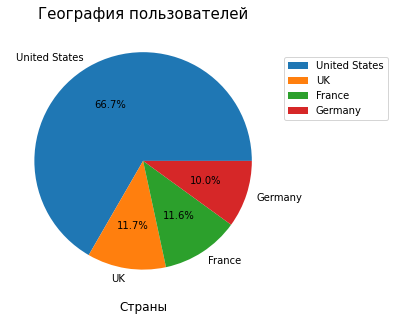

In [38]:
# построение круговой диаграммы
create_pie(region['user_id'], 'География пользователей', 'Страны', 5,5,1);

Приложением воспользовались клиента из США, Великобритании, Франции и Германии. Две трети пользователей (66.7%) приходится на США, почти в равных долях - из остальных стран. Из Германии чуть меньший процент пользователей.  

Напишу функцию на основе созданой сводной таблицы для постоения гистограммы с долями платящих. Она пригодится для визуализации доли платящих по регионам, устройствам и источникам привлечения.

In [39]:
# создание функции
def create_barh (col, title, xlabel, ylabel):
    payer = col.sort_values(by='payer, %').plot(kind='barh', y='payer, %')
    payer.grid(axis = 'x')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    return payer

Визуализирую процент платящих пользователей по странам.

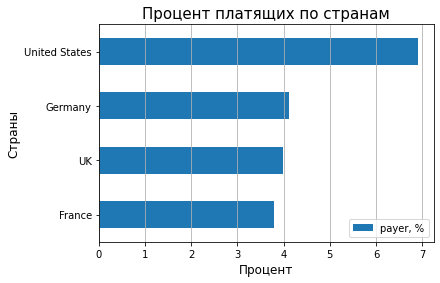

In [40]:
create_barh(region, 'Процент платящих по странам', 'Процент', 'Страны');

Значительно больший процент платящих пользователей приходится на США, почти 7%. Далее идут Германия (чуть более 4%), Великобритания (чуть менее 4%) и Франция (3.8%).

Визуализирую количество новых пользователей по времени привлечения в зависимости от региона.

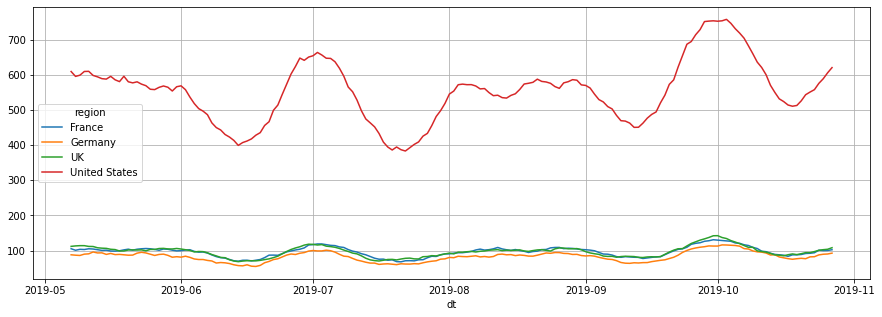

In [41]:
pl('region');

Наглядно заметно преимущество количества пользователей из США. Обращает на себя внимание склонность к синусоидному типу графика, особенно это заметно по США, но и по остальным странам это прослеживается. В основном с середины каждого месяца (за исключением мая и августа) наблюдается приток новых пользователей, который достигает своего пика к концу месяца, затем начинается спад. Можно предположить, что с середины каждого месяца начинает выходить реклама приложения во всех странах и набирает обороты до конца месяца. Далее активность рекламы идет на спад. Однако в мае и августе удавалось активно привлекать пользователей на протяжении целого месяца, но не на уровне пиков, а в среднем количестве.

### Устройства пользователей

Посмотрю, сколько пользователей заходили на сайт с каждого устройства и долю платящих.

In [42]:
device = df('device')
device

,user_id,"payer, %"
device,,
Mac,30042,6.36
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05


Построю круговую диаграмму с устройствами пользователей.

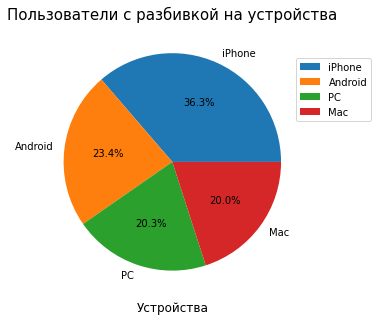

In [43]:
# построение круговой диаграммы
create_pie(device['user_id'], 'Пользователи с разбивкой на устройства', 'Устройства', 5,5,1);

Треть пользователей заходят в приложение с iPhone, примерно четвертая часть - с Android, и по пятой части -  с РС и Mac.  

Визуализирую процент платящих пользователей по устройствам.

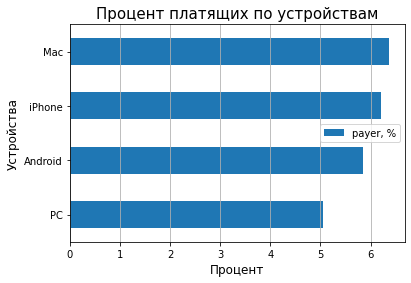

In [44]:
create_barh(device, 'Процент платящих по устройствам', 'Процент', 'Устройства');

БОльшая доля платящих приходится на пользователей с устройством Mac (6.36%), чуть меньший процент - iPhone (6.21%)  и Android (5.85%). Самый низкая доля платящих - пользователи РС (5.05%). 

Визуализирую количество новых пользователей по времени привлечения в зависимости от устройства.

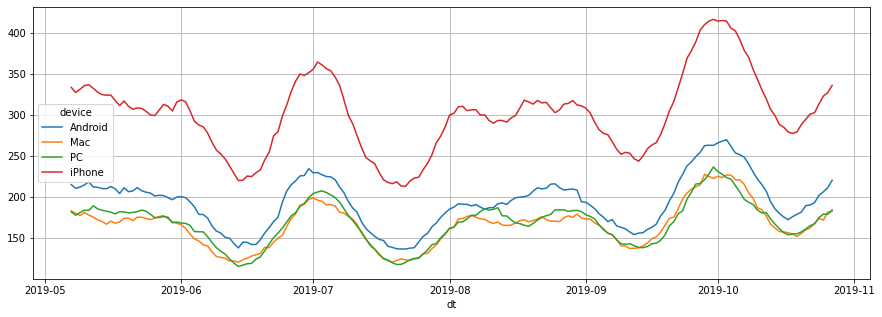

In [45]:
pl('device');

На протяжении всего периода лидирует iPhone. Так же, как и в разбивке по странам, прослеживается синусоидность графика с пиками в начале/конце месяца и спадами к середине месяца. Май и август по-прежнему примерно на одном уровне по каждому устройству.

### Рекламные источники привлечения

Посмотрю, сколько пользователей заходили на сайт с рекламных источников привлечения и долю платящих.

In [46]:
channel = df('channel')
channel

,user_id,"payer, %"
channel,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


Построю круговую диаграмму с рекламными источниками привлечения.

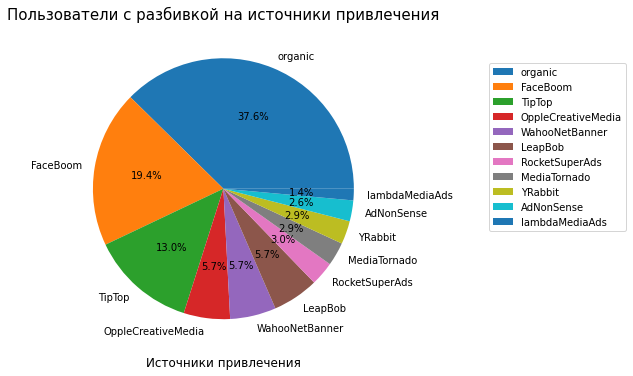

In [47]:
# построение круговой диаграммы
create_pie(channel['user_id'], 'Пользователи с разбивкой на источники привлечения',\
           'Источники привлечения', 6,6,1.5);

Основная часть пользователей пришла в приложение органическим путем, далее из Faceboom (19.4%)  и из TipTop (13%). Остальные рекламные источники привлекли от 5.7 до 1.4% пользователей каждый.

Визуализирую процент платящих пользователей по устройствам.

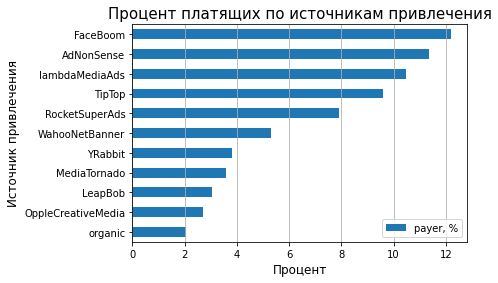

In [48]:
create_barh(channel, 'Процент платящих по источникам привлечения', 'Процент',\
            'Источник привлечения');

ТОП5 источников привлечения платящих пользователей: Faceboom (12.2%), AdNonSense (11.34%),  lambdaMediaAds (10.47%), TipTop (9.6%) и RocketSuperAds (7.91%). Основной контингент пользователей, пришедших из Organic, является самыми неплатящим (всего 2%).

Визуализирую количество новых пользователей по времени привлечения в зависимости от источника привлечения.

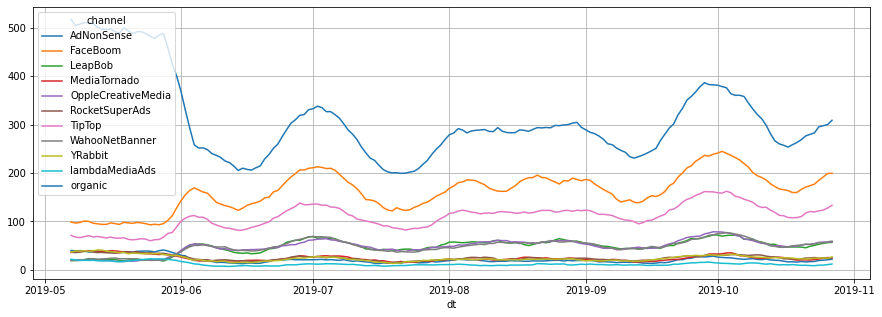

In [49]:
pl('channel');

В лидерах на протяжении всего периода Organic, далее Faceboom и TipTop. Наблюдается все та же синусоидность графика. Единственное, в мае заметно выделялся Organic (в среднем около 500 пользователей в день), остальные источники привлечения на заметно более низком уровне, даже Faceboom и TipTop (100 и менее пользователей в день).

**Выводы**

- Созданы профили пользователей.
- Определины минимальная и максимальная даты привлечения пользователей.

Получены следующие результаты:

- Большая доля пользователей приходит в приложение из США, пользователи из США являются самыми платящими.
- Треть пользователей заходят в приложение с iPhone, примерно четвертая часть - с Android, и по пятой части -  с РС и Mac. БОльшая доля платящих приходится на пользователей с устройством Mac (6.36%), чуть меньший процент - iPhone (6.21%)  и Android (5.85%). Самый низкая доля платящих - пользователи РС (5.05%). 
- Основная часть пользователей приходит в приложение органическим путем, далее из Faceboom (19.4%)  и из TipTop (13%). Остальные рекламные источники привлекли от 5.7 до 1.4% пользователей каждый. ТОП5 источников привлечения платящих пользователей: Faceboom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds. Основной контингент пользователей, пришедших из Organic, является самым неплатящим (всего 2%).

[в начало](#start1)

## Маркетинг

### Расходы на маркетинг

Рассчитаю общую сумму расходов на маркетинг, данные возьму из таблицы `costs`.

In [50]:
display('Общая сумма расходов на маркетинг: {:.2f}'.format(costs['costs'].sum()))

'Общая сумма расходов на маркетинг: 105497.30'

Выясню, как траты распределены по источникам привлечения пользователей.

In [51]:
costs_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(
    by='costs', ascending=False
)
costs_channel

,costs
channel,
TipTop,"54,751.30"
FaceBoom,"32,445.60"
WahooNetBanner,"5,151.00"
AdNonSense,"3,911.25"
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
LeapBob,"1,797.60"
lambdaMediaAds,"1,557.60"
MediaTornado,954.48


Визуализирую полученные данные с помощью функции `create_pie`, написанной в п.4.1.

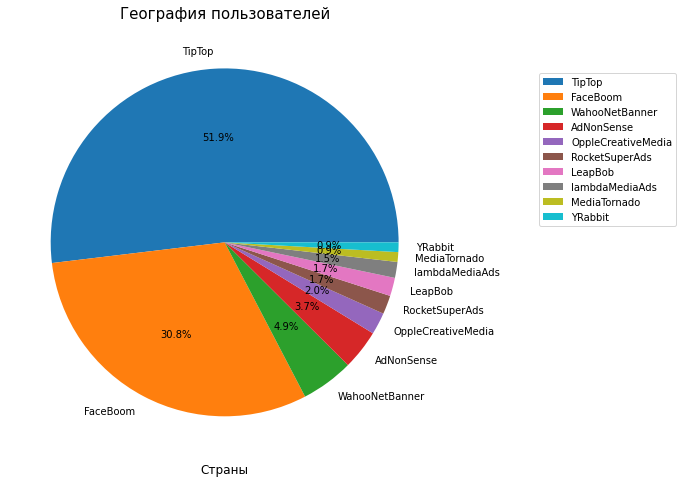

In [52]:
# построение круговой диаграммы
create_pie(costs_channel['costs'], 'География пользователей', 'Страны', 8,8,1.3);

Общая сумма расходов на маркетинг за изучаемый период составила 105497.30. При этом чуть более половины стоимости всей рекламы вложено в TipTop и почти треть в FaceBoom. В остальные каналы вложено 4.9 и менее процентов в каждый.  

Посмотрю на изменение метрик во времени.

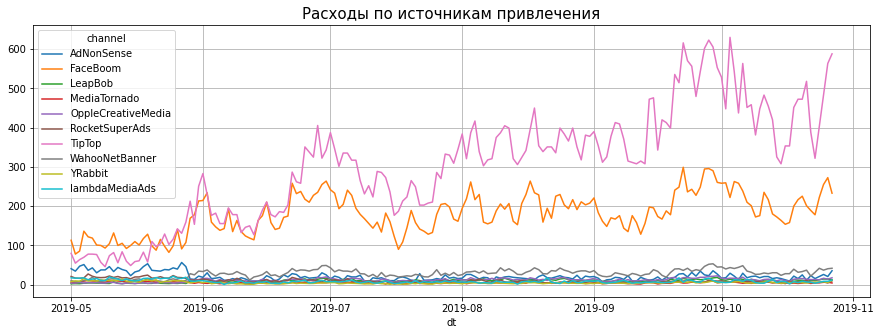

In [53]:
# исключение бесплатного источника Оrganic
profiles= profiles.query('channel != "organic"')
# создание сводной таблицы и построение графика
profiles.pivot_table(
        index='dt', 
        columns='channel', 
        values='acquisition_cost',  
        aggfunc='sum' 
    ).plot(
    figsize=(15, 5), 
    grid=True
)
plt.title('Расходы по источникам привлечения', fontsize=15);

К концу мая расходы на рекламу в каналах TipTop и FaceBoom начали увеличиваться и достигли пика в конце сентября - начале октября 2019 года. Вложение в остальные источники оставались на низком уровне на протяжении всего периода. В конце июня вложения в рекламу в TipTop начали стабильно превышать FaceBoom, разрыв между расходами продолжал расти до конца изучаемого периода.  
Как было подмечено в п.4.3, значительная часть пользователей в мае пришла в приложение из Organic. На данном графике видно, что как раз в мае были минимальные вложения в рекламу.

### Средняя стоимость привлечения одного покупателя

Рассчитаю средний CAC на одного пользователя по всем источникам привлечения пользователей.

In [54]:
display('Средняя стоимость привлечения пользователя: {:.2f}'.\
        format(profiles['acquisition_cost'].mean()))

'Средняя стоимость привлечения пользователя: 1.13'

Расситаю средний CAC на одного пользователя для каждого источника трафика.

In [55]:
cost_per_id = profiles.groupby('channel').agg(
    {'acquisition_cost': 'mean'}
).sort_values(
    by='acquisition_cost', ascending=False
).reset_index()
cost_per_id

,channel,acquisition_cost
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


Построю гистограмму средней стоимости привлечения пользователя по источникам привлечения. Укажу в ней среднюю стоимость привлечения пользователя 1.13.

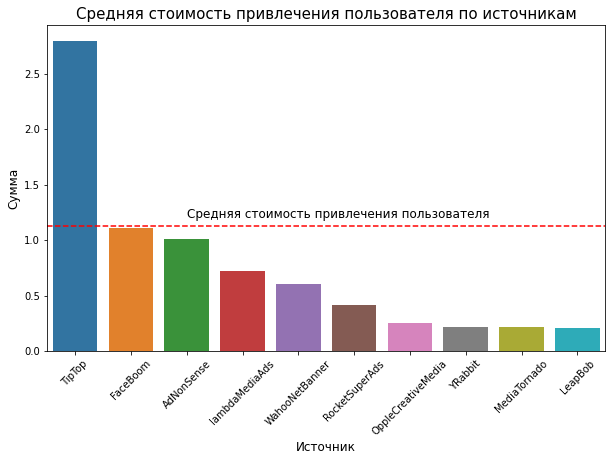

In [56]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x='channel', y="acquisition_cost", data=cost_per_id)
plt.axhline(y=1.13, color='red', linestyle='--')
plt.xticks(rotation=45) 
plt.text(2, 1.2, 'Средняя стоимость привлечения пользователя', fontsize=12)
plt.title('Средняя стоимость привлечения пользователя по источникам', fontsize=15)
ax.set_xlabel('Источник', fontsize=12)
ax.set_ylabel('Сумма',fontsize=12);

Дороже всего обходится пользователь, пришедший из TipTop. В него вкладывается 2.8 денежных единиц, тогда как средняя стоимость привлечения составляет 1.3 единицы. В пользователя, пришедшего из TipTop, вкладывается чуть ниже среднего - 1.1 денежные единицы. Пользователи из остальных рекламных источников обходятся еще дешевле.  

**Выводы**

- Общая сумма расходов на маркетинг за изучаемый период составила 105497.30. При этом чуть более половины стоимости всей рекламы вложено в TipTop и почти треть в FaceBoom. В остальные каналы вложено 4.9 и менее процентов в каждый.  
- Средняя стоимость привлечения пользователя составила 1.13 денежных единицы.
- К концу мая расходы на рекламу в каналах TipTop и FaceBoom начали увеличиваться и достигли пика в конце сентября - начале октября 2019 года. Вложение в остальные источники оставались на низком уровне на протяжении всего периода. В конце июня вложения в рекламу в TipTop начали стабильно превышать FaceBoom, разрыв между расходами продолжал расти до конца изучаемого периода.
- Дороже всего обходится пользователь, пришедший из TipTop (2.8 денежных единиц). В пользователя, пришедшего из TipTop, вкладывается чуть ниже среднего - 1.1 денежные единицы. Пользователи из остальных рекламных источников обходятся еще дешевле.  

[в начало](#start1)

## Оценка окупаемости рекламы для привлечения пользователей

### Общая окупаемость рекламы

Проанализирую общую окупаемость рекламы. Построю графики LTV и ROI, графики динамики LTV, CAC и ROI, а также графики удержания и конверсии и их динамики.  
Задам горизонт анализа две недели.

In [57]:
horizon_days = 14  # горизонт анализа 

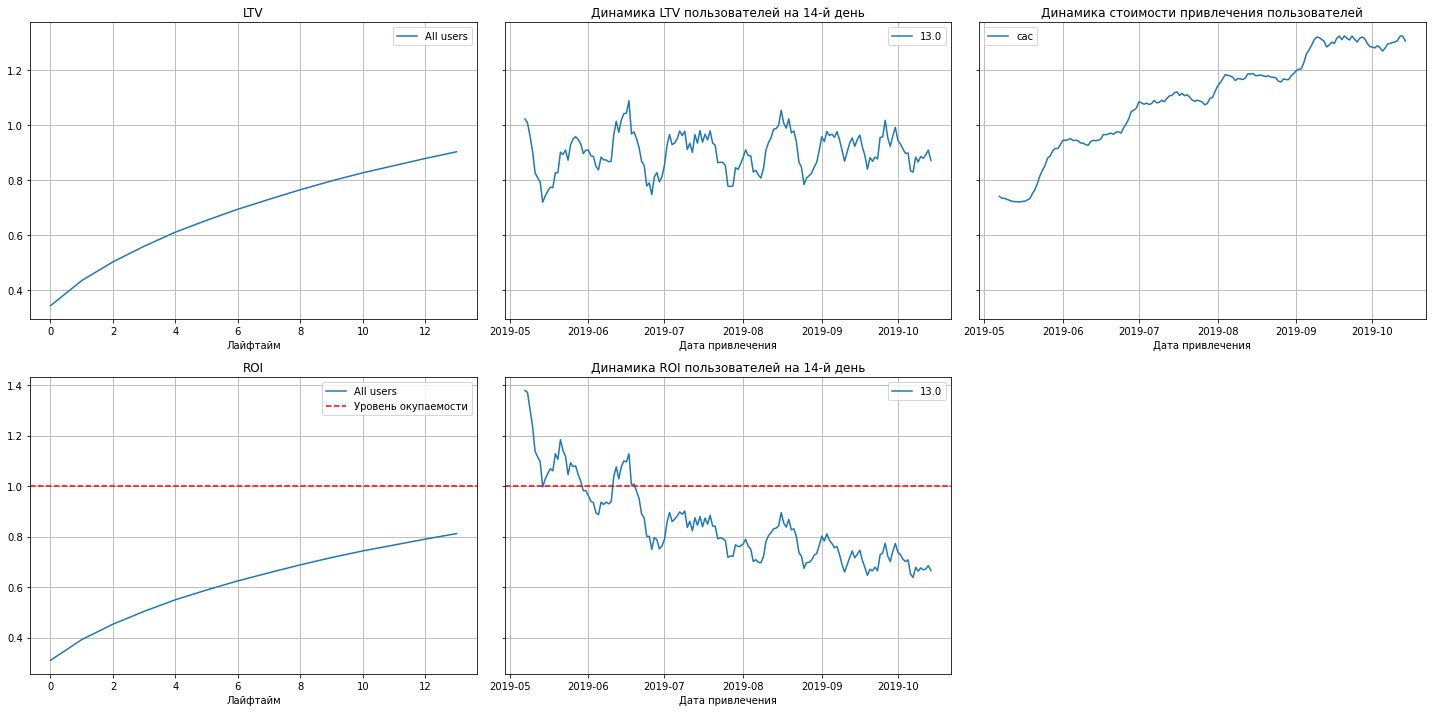

In [58]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles, orders, observation_date, horizon_days
)
# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

«Пожизненная ценность» клиента (LTV) на протяжении 14 дней растет, что естественно.

Динамика LVT пользователей на 14й день склонна к синусоидному типу, что является результатом вложений в рекламу, динамика которой была подмечена в п.п.4.3 и 5.1. Здесь явно наблюдается шаг в 14 дней. Те пользователи, которые привлеклись на пике рекламы в бОльшем количестве (начало/конец месяца), на 14й день (середина месяца) приносят больше денег.  

График САС отражает рост стоимости привлечения пользователей.  

Клиенты не окупаются, показатель ROI на протяжении всего жизненного цикла клиента находится ниже уровня окупаемости, а в конце 14ти дневного цикла на уровне 80%. Причем клиенты, привлеченные до середины мая и в начале июня, окупались полностью, а у привлеченных во второй половине мая и с середины июня окупаемость упала ниже уровня окупаемости и синусоидно продолжала падать.

### Окупаемость рекламы с разбивкой по странам

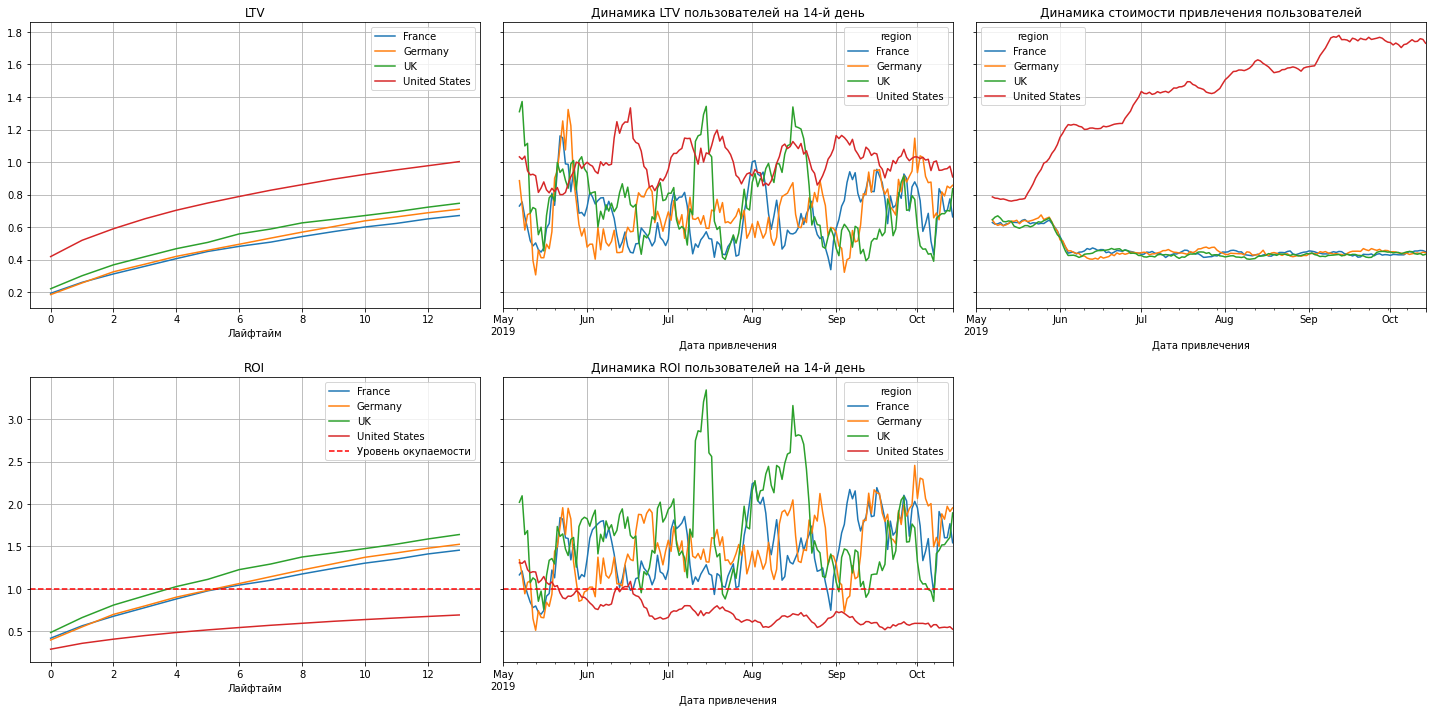

In [59]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles, orders, observation_date, horizon_days, dimensions=['region']
)
# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама окупается везде, кроме США. До 20х чисел мая и несколько дней в середине июня в США реклама окупалась, с остальное время нет, более того, наблюдается тенденция к снижению окупаемости. К концу октября она опустилась до уровня 50%.
Стоимость привлечения практически одинакова для всех стран, кроме США. Причем с середины мая стоимость привлечения в США резко возросла и продолжала расти весь изучаемый период. 
Можно сделать предварительный вывод о том, что на низкую окупаемость приложения влияют рекламные источники в США.


### Окупаемость рекламы с разбивкой по рекламным каналам

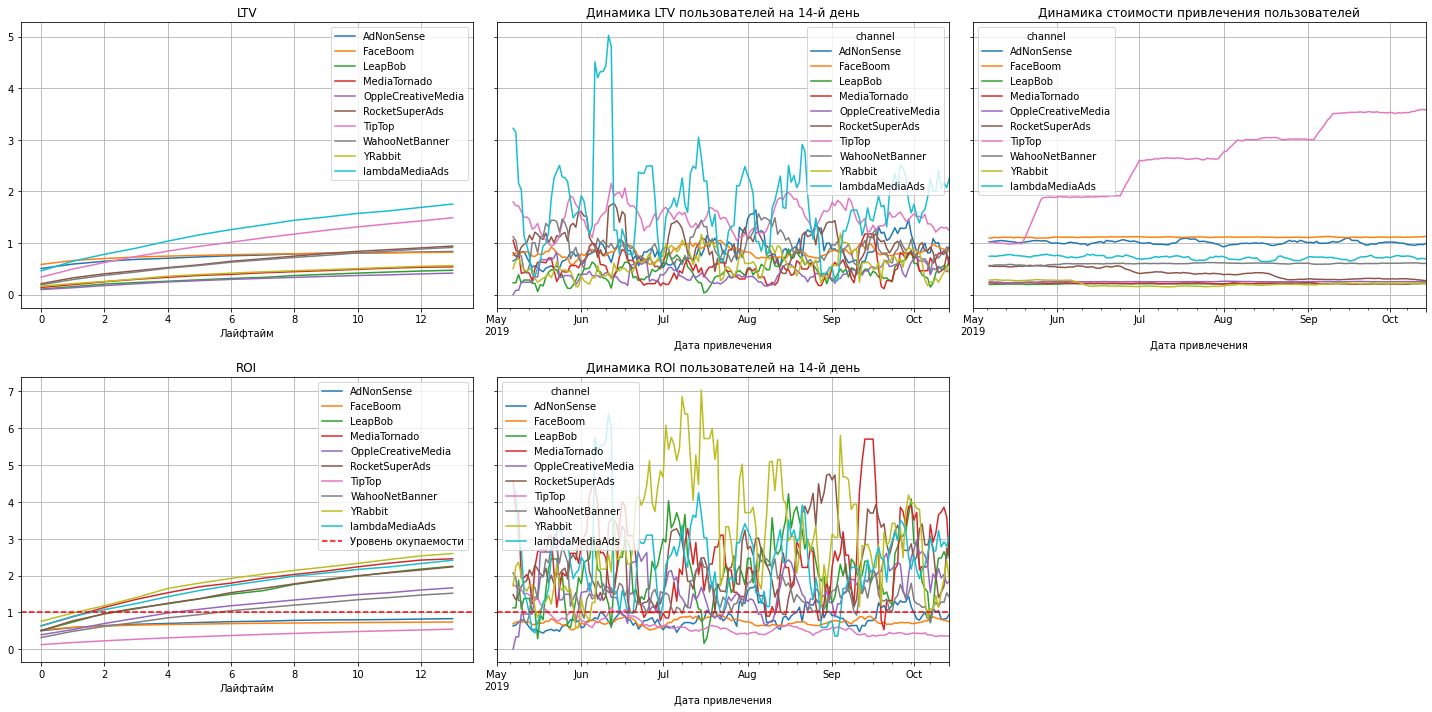

In [60]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Сразу бросается в глаза резкий рост стоимости привлечения пользователей в канале TipTop. По остальным рекламным источникам стоимость привлечения пользователей стабильна в течение всего периода.

Реклама не окупается только в трех рекламных источниках: разумеется, это TipTop, а также FaceBoom и AdNonSense.

Самый высокий LTV у пользователей, пришедших из lambdaMediaAds и TipTop. Пользователи из TipTop одни из самых платежеспособных, но при этом самые дорогие в затратах на рекламу.

### Окупаемость рекламы с разбивкой по устройствам

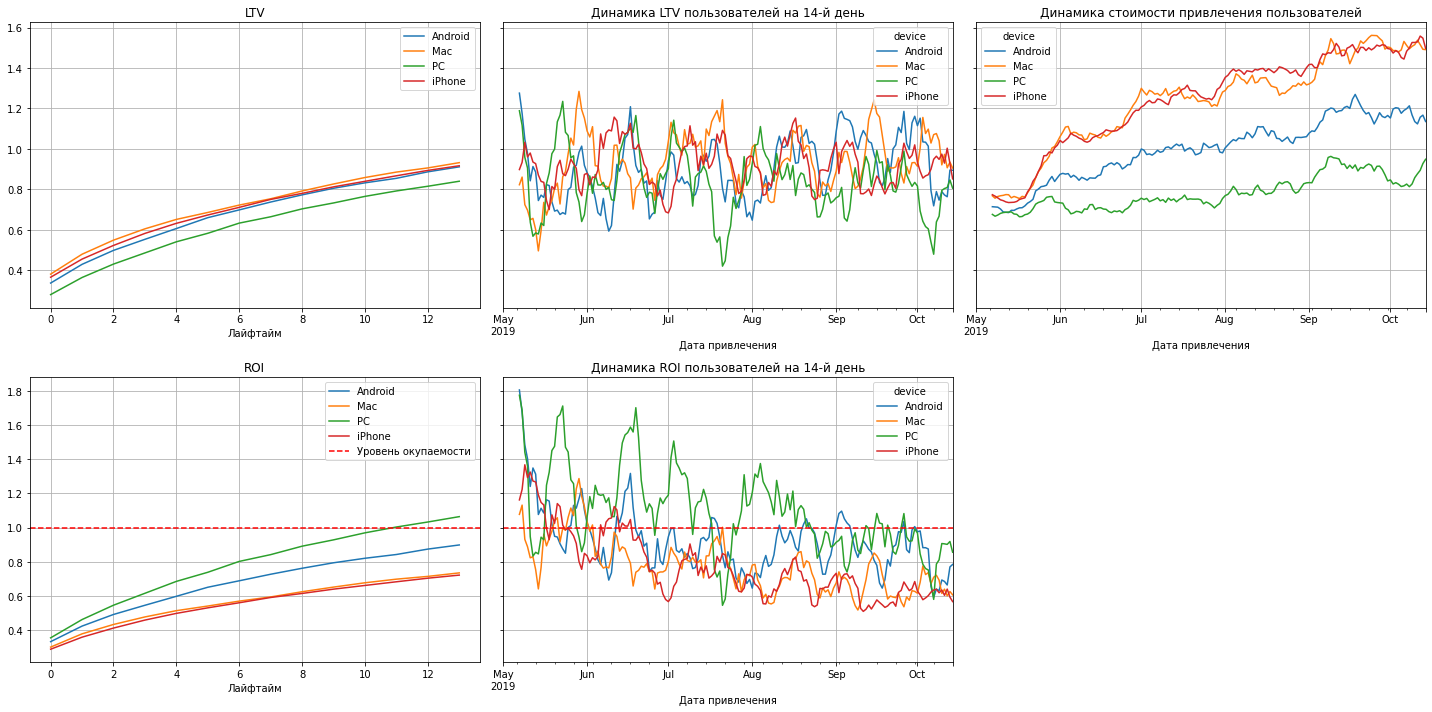

In [61]:
# считаю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles, orders, observation_date, horizon_days, dimensions=['device']
)
# строю графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама окупается только для пользователей РС, причем эти пользователи меньше расстаются со своими деньгами.
Стоимость привлечения по всем источникам привлечения растет. Заметнее всего у Mac и iPhone, далее идет Android и чуть заметен рост у PC.
Самый низкий LTV у пользователей РС. У пользователей остальных устройств он практически одинаков.

### Конверсия с разбивкой по устройствам

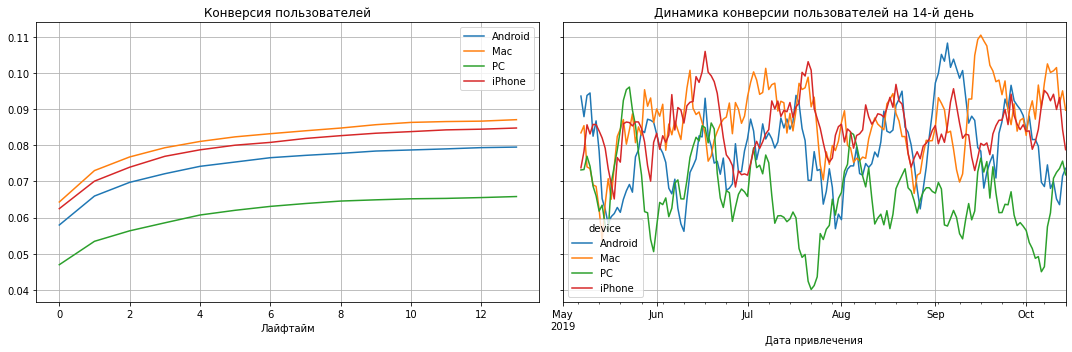

In [62]:
# смотрю конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, хуже всего конвертируются пользователи PC, лучше - пользователи Mac и iPhone. 

### Удержание с разбивкой по устройствам

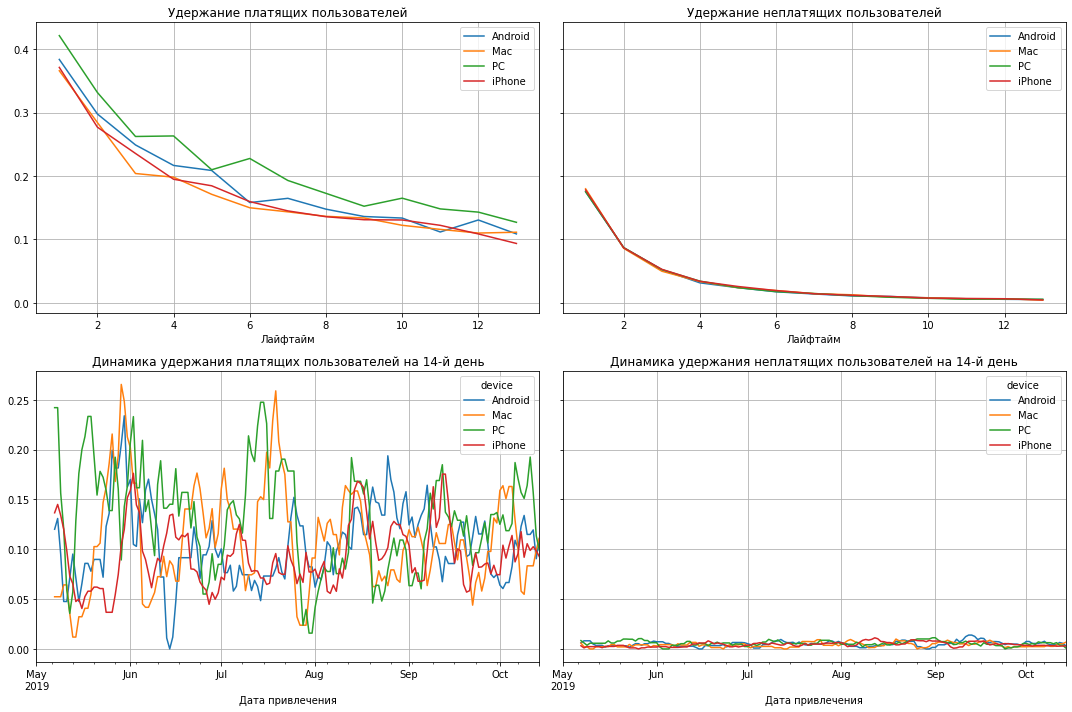

In [63]:
# смотрю удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удерживаются лучше всего пользователи PC, пользователи Mac и iPhone хуже всех.

### Конверсия с разбивкой по странам

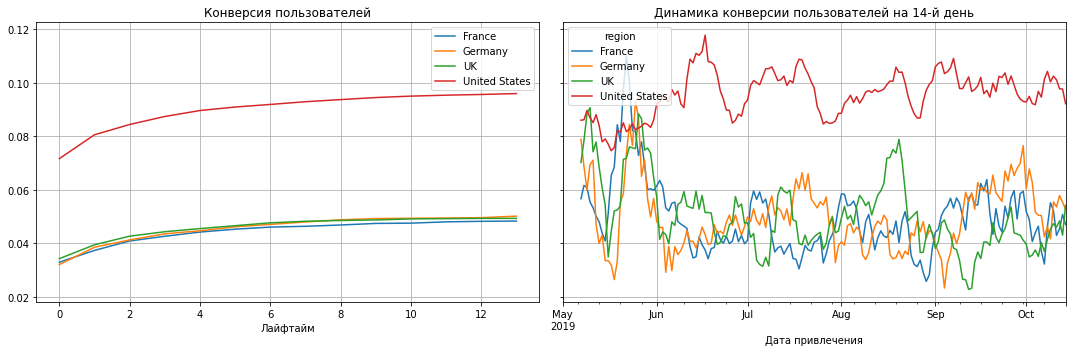

In [64]:
# смотрю конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конвертируются пользователи из США. Пользователи из других стран практически одинаково хуже.

### Удержание с разбивкой по странам

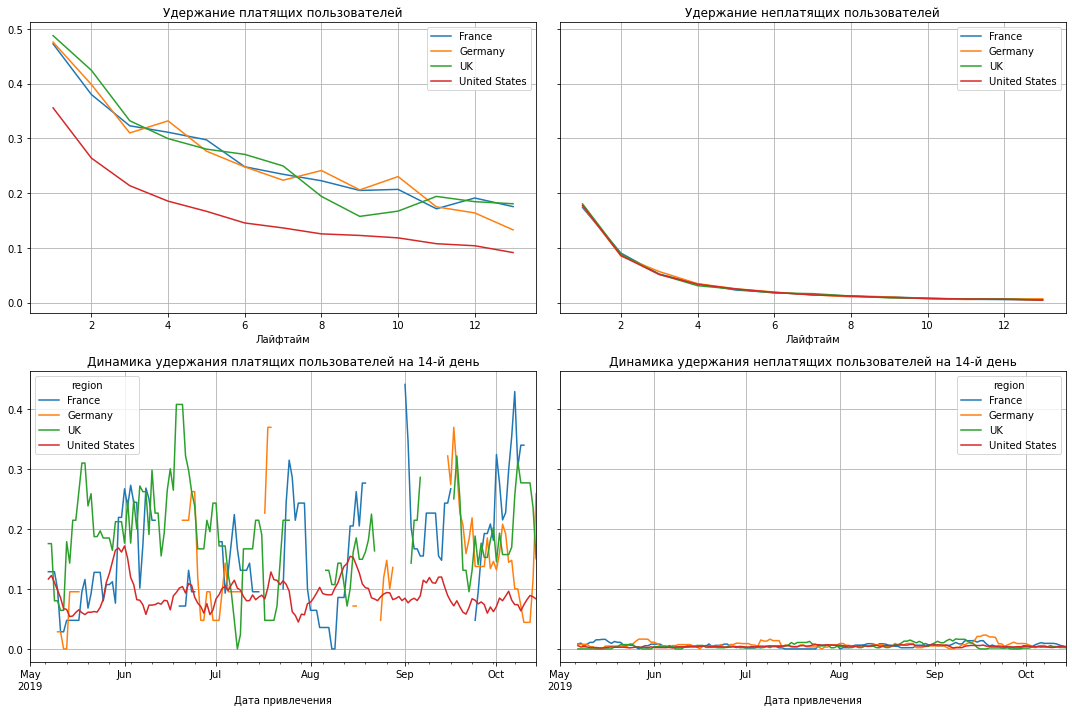

In [65]:
# смотрю удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удерживаются хуже всего пользователи из США.

### Конверсия с разбивкой по рекламным каналам

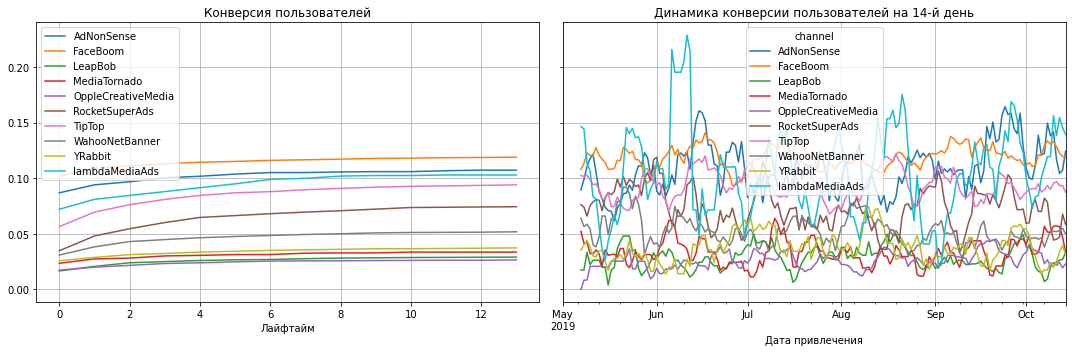

In [66]:
# смотрю конверсию с разбивкой по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конверсия пользователей у FaceBoom, AdNonSense и lambdaMediaAds.

### Удержание с разбивкой по рекламным каналам

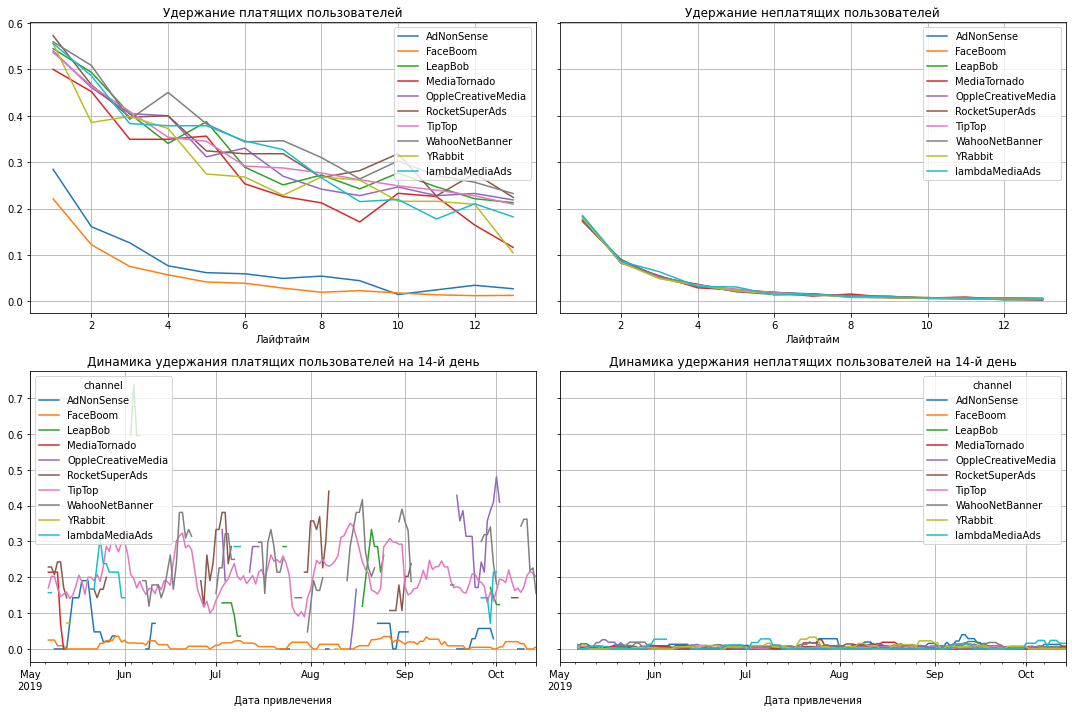

In [67]:
# смотрю удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А вот удержание у FaceBoom и  AdNonSense значительно ниже остальных рекламных каналов.  

**Выводы**

- Клиенты не окупаются, общий показатель ROI на протяжении всего жизненного цикла клиента находится ниже уровня окупаемости, а в конце 14ти дневного цикла на уровне 80%.
- Реклама окупается везде, кроме США. Стоимость привлечения практически одинакова для всех стран, кроме США. С середины мая стоимость привлечения в США резко возросла и продолжала расти весь изучаемый период. Можно сделать предварительный вывод о том, что на низкую окупаемость приложения влияют рекламные источники в США.
- Резкий рост стоимости привлечения пользователей в канале TipTop. По остальным рекламным источникам стоимость привлечения пользователей стабильна в течение всего периода. Реклама не окупается только в трех рекламных источниках: TipTop, FaceBoom и AdNonSense.Самый высокий LTV у пользователей, пришедших из lambdaMediaAds и TipTop. Пользователи из TipTop одни из самых платежеспособных, но при этом самые дорогие в затратах на рекламу.
- Реклама окупается только для пользователей РС, причем эти пользователи меньше расстаются со своими деньгами.Самый низкий LTV у пользователей РС. У пользователей остальных устройств он практически одинаков.
- Хуже всего конвертируются пользователи PC, лучше - пользователи Mac и iPhone.
- Удерживаются лучше всего пользователи PC, пользователи Mac и iPhone хуже всех.
- Лучше всего конвертируются пользователи из США. Пользователи из других стран практически одинаково хуже.
- Удерживаются хуже всего пользователи из США.
- Лучше всего конверсия пользователей у FaceBoom, AdNonSense и lambdaMediaAds.
- Удержание у FaceBoom и  AdNonSense значительно ниже остальных рекламных каналов. 

Самые низкие затраты на рекламу для пользователей РС, они хуже всего конвертируются, но при этом их удержание самое высокое и реклама для них полностью окупается. Эти пользователи самые выгодные.
На общую низкую окупаемость влияет реклама в США, а именно дороговизна рекламы в канале TipTop, стоимость которой растет на протяжении всего исследуемого периода. 

[в начало](#start1)

## Выводы

- Клиенты не окупаются, показатель ROI на протяжении всего жизненного цикла клиента находится ниже уровня окупаемости, а в конце 14ти дневного цикла на уровне 80%. 
- Реклама окупается везде, кроме США. Стоимость привлечения практически одинакова для всех стран, кроме США.
- Резкий рост стоимости привлечения пользователей в канале TipTop. По остальным рекламным источникам стоимость привлечения пользователей стабильна в течение всего периода.
- Реклама окупается только для пользователей РС, причем эти пользователи меньше расстаются со своими деньгами.Самый низкий LTV у пользователей РС. 
- Хуже всего конвертируются пользователи PC, лучше - пользователи Mac и iPhone. Лучше всего конвертируются пользователи из США. Пользователи из других стран практически одинаково хуже. Лучше всего конверсия пользователей у FaceBoom, AdNonSense и lambdaMediaAds.
- Удерживаются лучше всего пользователи PC, пользователи Mac и iPhone хуже всех. Удерживаются хуже всего пользователи из США. Удержание у FaceBoom и  AdNonSense значительно ниже остальных рекламных каналов. 

Причины неэффективности привлечения пользователей:

- Завышенные тарифы на рекламу в рекламном источнике TipTop.
- Проблемы в работе приложения на устройствах Mac, iPhone и Android.
- Проблемы в работе приложения в США.

Рекомендации:

- Выйти на переговоры с рекламным подраздалением канала TipTop с целью достижения договоренности о значительном снижении стоимости  рекламных услуг.
- Снизить объем рекламы в данном источнике.
- Увеличить объем рекламы в других рекламных каналах, в которых реклама полностью окупается (все, кроме TipTop, FaceBoom и AdNonSense).
- Доработать приложение для пользователей PC в части первого платежа, т.к. их конвертация самая низкая, а удержания самое высокое. Они готовы пользоваться приложением, однако первый раз делать это либо неудобно, либо имеются технические проблемы при оплате. 
- Доработать приложение для пользователей Mac, iPhone и Android в части оплаты дополнительных сервисов, т.к. конвертация этих пользователей хорошая, а удержание низкое. Либо неудобно повторно оплачивать, либо имеются технические проблемы.
- Отдельно изучить интерфейс и работу приложения в США. Конвертация пользователей высокая, удержание низкое. Причем, пользователи из США являются самыми платежеспособными и составляют две трети пользователей приложения. Налицо проблема либо в неудобстве приложения, либо в технических проблемах при повторных оплатах.
- Доработать приложение в целом, основываясь на отзывах пользователей с целью увеличения удержания пользователей.
- Поскольку реклама в Европейских странах окупается, есть смысл увеличить расходы на нее с целью привлечения бОльшего количества пользователей.
- Низкие LTV и конверсия в странах Европы говорят о возможных технических проблемах при оплате либо неудобстве использования приложением, необходимо провести подробный технических анализ и доработку приложения.
- Удержание клиентов в Европе находится на хорошем уровне, однако встречаются периоды, когда ни один пользователь из когорты не "доживает" до 14 дня. Следует в первую очередь разобраться с технической стороной работы приложения и оплаты в нем.

[в начало](#start1)